### Wavelength and Frequency Relation

frequency = velocity of light / Wavelength

wavelength = velocity of light / frequency

Text(0, 0.5, 'Wavelength in cm')

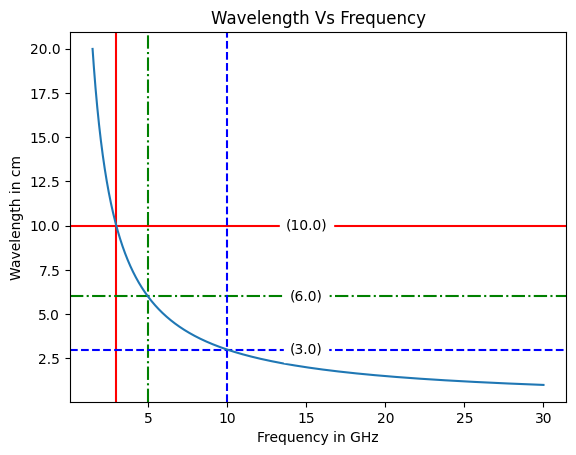

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def calcfrequency(wavelength, Ghz=True, cm=True):
    if cm:
        wavelength = wavelength * 10 ** (-2)
    
    c = 3 * 10 ** 8 # Speed of Light
    if Ghz:
        conv_fact = 10 ** 9 # 1GHz = 10^9 HZ
    else:
        conv_fact = 1
    f = c/wavelength # Frquency and wavelength relation
    f =  f / conv_fact
    return f

def calcwavelength(freq,  Ghz=True, cm=True):
    if Ghz:
        freq = freq * 10 ** 9
        
    c = 3 * 10 ** 8 # Speed of Light
    if cm:
        conv_fact = 100 # 1GHz = 10^9 HZ
    else:
        conv_fact = 1
    y = c/freq # Frquency and wavelength relation
    y =  y * conv_fact
    return y

def addrefline(plt, linefreq, linestyle='-', color='r', x_ref = 15):
    plt.axvline(x = linefreq, color = color, linestyle = linestyle) 
    plt.axhline(y = calcfrequency(linefreq), color = color, linestyle = linestyle) 
    plt.text(x_ref, calcfrequency(linefreq), f'({round(calcfrequency(linefreq),2)})', fontsize=10, va='center', ha='center', backgroundcolor='w')
    return plt

frequencies = [freq for freq in np.arange(1,20,0.01)]
wavelengths = [calcwavelength(freq) for freq in frequencies]


ax = addrefline(plt, 3)
ax = addrefline(ax, 5, '-.','g')
ax = addrefline(ax, 10, '--', 'b')
plt.plot(wavelengths,frequencies)
plt.title('Wavelength Vs Frequency')
plt.xlabel("Frequency in GHz")
plt.ylabel("Wavelength in cm")

### Doppler Shift
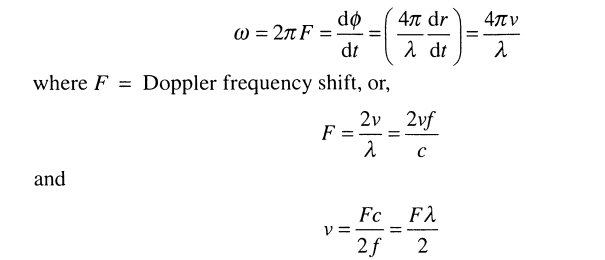

In [12]:
# Velocity or Doppler Shift calculation
def calcVelocity(wavelength, dopplershift, cm=True):
    if cm:
        wavelength = wavelength * 10 ** (-2)
    v = dopplershift * wavelength/2
    return v

def calcDopplershift(wavelength, velocity, cm=True):
    if cm:
        wavelength = wavelength * 10 ** (-2)
    dopplershift = 2 * velocity / wavelength
    return dopplershift

Tr = 10000000000
Trec = Tr +  1000 #Moving Towards
dopplershift = (Trec - Tr)  #-ve means source of the wave is moving away from the observer. +ve means it is moving towards radar

print(calcVelocity(10, dopplershift))
print(calcDopplershift(10, 25, cm=True))

50.0
500.0


### Beam Height calculation
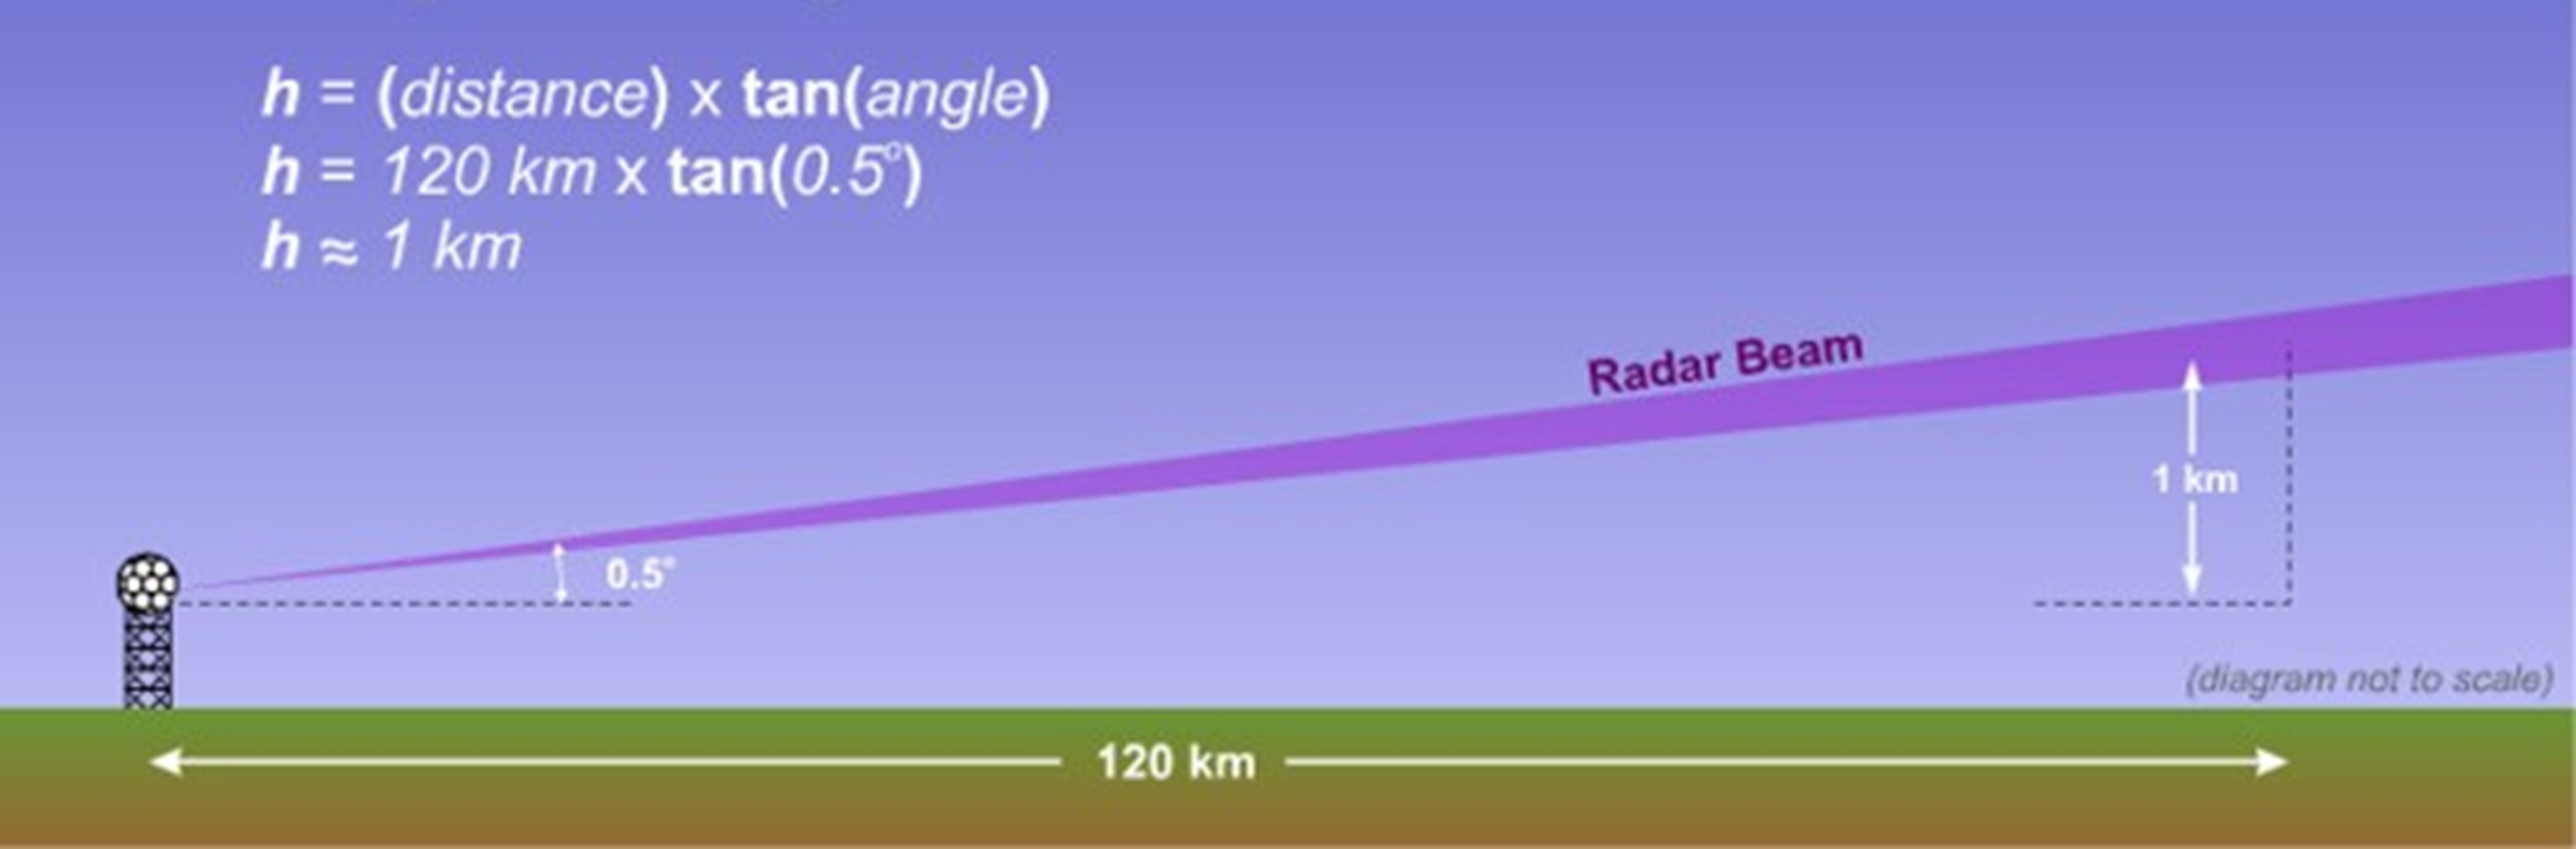

Not Considering the Earth Curvature for simple understanding

In [13]:
import math
distance = 120
towerheight = 10
angle = math.radians(0.5)
beam_height = round(math.tan(angle) * distance, 2)
actual_height = round(towerheight/1000 + beam_height, 2)
print(actual_height, beam_height)

1.06 1.05


### Continuous Wave Radar

Why Continous wave Radar cannot be used for Metorological application?

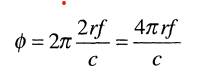
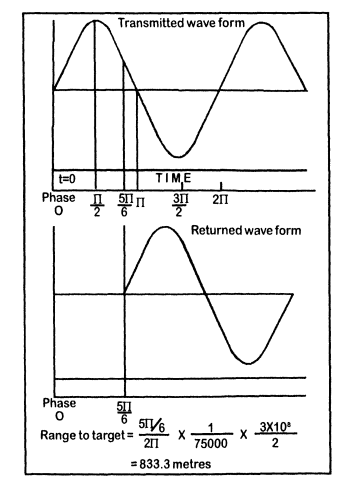


Text(0, 0.5, 'Maximum Unambiguous Range in km')

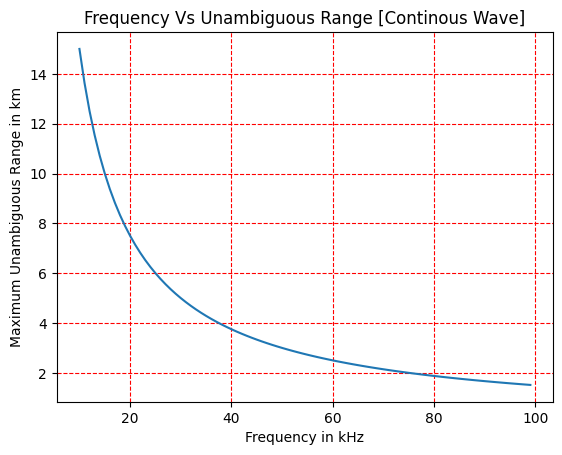

In [14]:
# Range calculation with Continous Pulse Radar
import math

def cRange(frequency, phi, kHz=True, km=True):
    if kHz:
        frequency = frequency * 1000
    c = 3 * 10**8
    pi = math.pi
    phi = phi * pi
    range = phi * (1/frequency) * c/(4*pi)
    if km:
        range = range/1000
    return range

freqs = [a for a in range(10,100)]
maxrange = [cRange(freq, 2) for freq in freqs]
plt.plot(freqs,maxrange)
plt.grid(color='r', linestyle='--')
plt.title('Frequency Vs Unambiguous Range [Continous Wave]')
plt.xlabel("Frequency in kHz")
plt.ylabel("Maximum Unambiguous Range in km")

### Beam Resolution
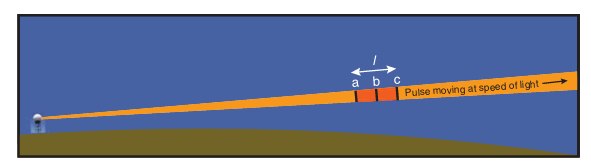

 The red area denotes a radar pulse. The along-beam resolution is equal to half the pulse
 length


In [15]:
def beamresolution(tow, us = True):
    if us:
        tow = tow * 10 ** (-6)
    c = 3 * 10 ** 8
    l = c * tow
    res = l/2
    return l, res
res = beamresolution(2)
res

(600.0, 300.0)

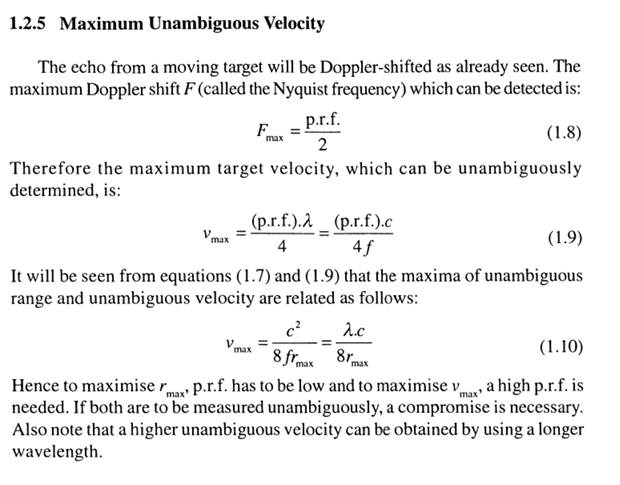

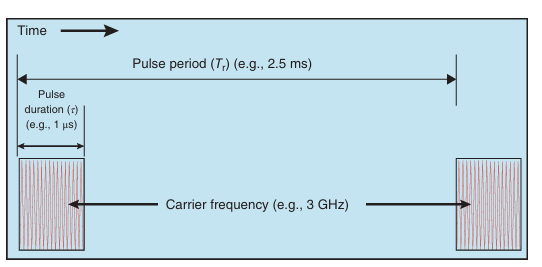

In [16]:
# Pulse radar Range equation
def pulsedwr(wavelength, prt, cm = True, ms= True, km=True):
    if cm:
        wavelength = wavelength * 10 ** (-2)
        
    if ms:
        prt = prt * 10 ** (-3)
        
    c = 3 * 10**8 # Speed of Light
    prf = 1 / prt # in Hz
    Fmax = prf/2 #Maximum Doppler Shift as per Nyquist Criteria
    
    rmax = c/(2 * prf) #RMAX
    vmax = calcVelocity(wavelength, Fmax, False)
    
    if km:
        rmax = rmax /1000
    
    return rmax, vmax, Fmax, prf

case0 = pulsedwr(calcwavelength(3), 2.5)
case1 = pulsedwr(5,1)
case2 = pulsedwr(5,2)
print(case0,case1, case2)


(375.0, 10.0, 200.0, 400.0) (150.0, 12.5, 500.0, 1000.0) (300.0, 6.25, 250.0, 500.0)


In [17]:
def antennadia(bw, wavelength, cm = True):
    if cm:
        wavelength = wavelength * 10 ** (-2)
    D = 70 * wavelength / bw # BW = 70 lambda / D
    return D

Text(0, 0.5, 'Antenna Dia in m')

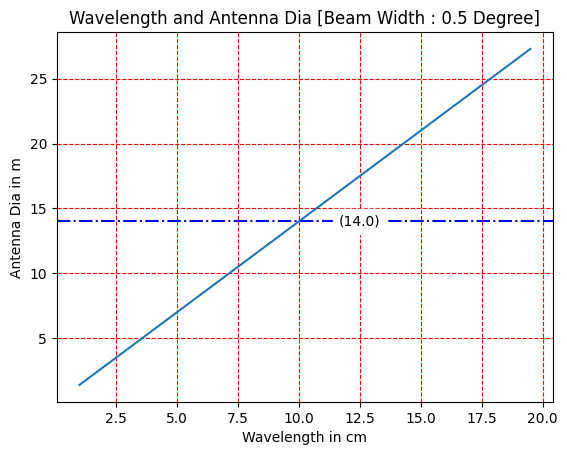

In [18]:
wavelengths = [a for a in np.arange(1, 20, 0.5)]
beamwidth = 0.5
antennadias = [antennadia(beamwidth, wavelength) for wavelength in wavelengths]
plt.plot(wavelengths, antennadias)
plt.grid(color='r', linestyle='--')
plt.title(f'Wavelength and Antenna Dia [Beam Width : {beamwidth} Degree]')
plt.axhline(y = antennadia(beamwidth, 10), color = 'b', linestyle = '-.') 
plt.text(12.5, antennadia(beamwidth, 10), f'({round(antennadia(beamwidth, 10),2)})', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.xlabel("Wavelength in cm")
plt.ylabel("Antenna Dia in m")

Text(0, 0.5, 'Antenna Dia in m')

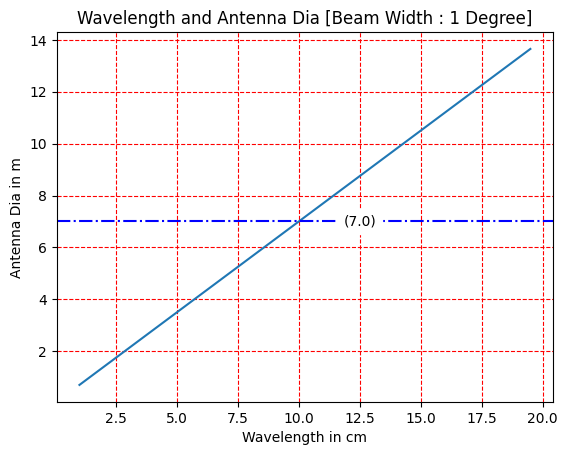

In [19]:
wavelengths = [a for a in np.arange(1, 20, 0.5)]
beamwidth = 1
antennadias = [antennadia(beamwidth, wavelength) for wavelength in wavelengths]
plt.plot(wavelengths, antennadias)
plt.grid(color='r', linestyle='--')
plt.title(f'Wavelength and Antenna Dia [Beam Width : {beamwidth} Degree]')
plt.axhline(y = antennadia(beamwidth, 10), color = 'b', linestyle = '-.') 
plt.text(12.5, antennadia(beamwidth, 10), f'({round(antennadia(beamwidth, 10),2)})', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.xlabel("Wavelength in cm")
plt.ylabel("Antenna Dia in m")

Text(0, 0.5, 'Antenna Dia in m')

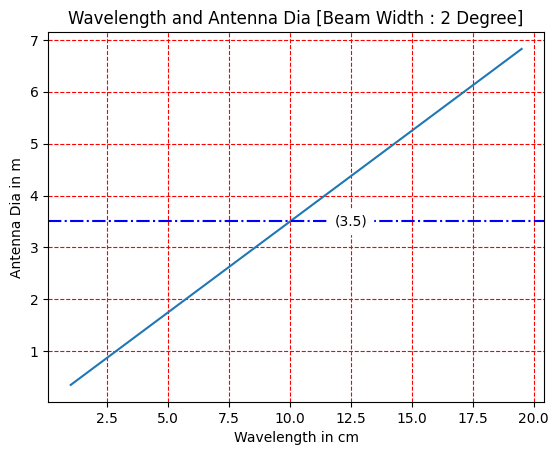

In [20]:
wavelengths = [a for a in np.arange(1, 20, 0.5)]
beamwidth = 2
antennadias = [antennadia(beamwidth, wavelength) for wavelength in wavelengths]
plt.plot(wavelengths, antennadias)
plt.grid(color='r', linestyle='--')
plt.title(f'Wavelength and Antenna Dia [Beam Width : {beamwidth} Degree]')
plt.axhline(y = antennadia(beamwidth, 10), color = 'b', linestyle = '-.') 
plt.text(12.5, antennadia(beamwidth, 10), f'({round(antennadia(beamwidth, 10),2)})', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.xlabel("Wavelength in cm")
plt.ylabel("Antenna Dia in m")